<h3>Ukázka použití software RADASH na výpočet radiačního poškození slitin s vysokou entropií</h3>

Nejdříve importujeme knihovnu <span style = "font-family: Courier New;">radash</span>, která obsahuje definici třídy objektů 
<span style = "font-family: Courier New;">Material</span> a metody pro práci s objekty této třídy

In [3]:
import radash

Dále importujeme také knihovnu pro numerické výpočty <span style = "font-family: Courier New;">numpy</span> a knihovnu pro tvorbu grafů <span style = "font-family: Courier New;">matplotlib.pyplot </span><br>
Obě tyto knihovny jsou standardní součástí distribuce Anaconda 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Nyní můžeme definovat nějakou slitinu. Vytvoříme tedy nový objekt třídy <span style = "font-family: Courier New;">Material</span> s názvem 
<span style = "font-family: Courier New;">hea1</span> 

In [7]:
hea1=radash.Material('Nb2TaTi3VZr2',['Nb','Ta','Ti','V','Zr'],[2,1,3,1,2],units='atomic') 

material: Nb2TaTi3VZr2
number of constituents: 5
Nb 41  0.222
Ta 73  0.111
Ti 22  0.333
V  23  0.111
Zr 40  0.222


V tomto případě se jedná o slitinu Nb<sub>2</sub>TaTi<sub>3</sub>VZr<sub>2</sub>.<br>
Syntaxe třídy <span style = "font-family: Courier New;">Material</span> je následující: <br>
&nbsp;<span style = "font-family: Courier New;"><b> radash.Material(name,elements,concentrations,**kwargs)</b></span> <br>
&nbsp;&nbsp;parametry:<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>name</b> : <i>string</i> </span> <br>
&nbsp;&nbsp;označení materiálu <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>elements</b> : <i>tuple of strings</i> </span> <br>
&nbsp;&nbsp;chemické prvky z kterých je slitina složena <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>concentrations</b> : <i>array of floats</i> </span> <br>
&nbsp;&nbsp;koncentrace jednotlivých prvků <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>**kwargs</b> </span> <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;">units: atomic, weight, default = atomic</span><br>
&nbsp;&nbsp;jednotky, v kterých jsou zadány koncentrace jednotlivých prvků (implicitně se předpokládají atomární koncentrace).<br> 
Koncentrace jednotlivých prvků nemusí být normované (zde jsme zadali, že jedna "molekula" slitiny obsahuje 2 atomy Nb, 1 atom Ta, 3 atomy Ti, 1 atom V a 2 atomy Zr). Program provede normalizaci a vypíše atomární koncentrace jednotlivých prvků.    
Pokud jsou koncentrace zadány v hmotnostních procentech s paramterem <span style = "font-family: Courier New;">units = weight </span> program je přepočítá do atomových procent a dále používá atomární koncentrace. <br>
<br>
K označení prvků používáme standardní chemické značky, první písmeno velké (např. Nb, V atd.) Při definování slitiny je možné použít jakýkoliv chemický prvek.<br>
Pokud použijeme značku neexistujícího prvku, program ohlásí chybu, např. 

In [9]:
hea2=radash.Material('CzNb2TaTi3VZr2',['Cz','Nb','Ta','Ti','V','Zr'],[3,2,1,3,1,2],units='atomic') 

error: unknown element symbol Cz


Program umožňuje vypočítat různé fyzikální parametry slitiny, kterou jsme vytvořili.<br>
Tyto parametry jsou vypočítané jako složením vážený průměr hodnot jednotlivých prvků, ze kterých se slitina skládá. Vypočtené parametry jsou užitečné pro hledání optimálního chemického složení slitiny pro danou aplikaci. 
<li>hustota slitiny (při výpočtu program používá hustoty jednotlivých prvků uložené v souboru <span  span style = "font-family: Courier New;"> density.txt</span>):</li>

In [11]:
hea1.get_density()

Nb  8.580 g/cm3
Ta 16.680 g/cm3
Ti  4.500 g/cm3
V   6.120 g/cm3
Zr  6.510 g/cm3
composition weighted mean density: 7.387 g/cm3


<li>molární hmotnost slitiny (při výpočtu program používá molární hmotnosti jednotlivých prvků uložené v souboru <span  span style = "font-family: Courier New;"> molar_weight.txt</span>):</li>

In [13]:
hea1.get_molar_weight()

Nb  92.906 g/mol
Ta 180.950 g/mol
Ti  47.867 g/mol
V   50.942 g/mol
Zr  91.224 g/mol
composition weighted molar weight:  82.639 g/mol


<li> atomární misfit parametr $\delta$ (při výpočtu program používá atomární poloměry  uložené v souboru <span  span style = "font-family: Courier New;"> atomic_radius.txt</span>):</li>

In [15]:
hea1.get_delta()

Nb  1.429 A
Ta  1.430 A
Ti  1.462 A
V   1.316 A
Zr  1.603 A
composition weighted mean atomic radius: 1.466 A
atomic misfit parameter: 5.746 %


<li> střední počet valenční elektronů, VEC parametr (při výpočtu program používá počty valečních elektronů jednotlivých prvků uložené v souboru <span  span style = "font-family: Courier New;"> VEC.txt</span>):</li>

In [17]:
hea1.get_VEC()

Nb 5.000 g/cm3
Ta 5.000 g/cm3
Ti 4.000 g/cm3
V  5.000 g/cm3
Zr 4.000 g/cm3
composition weighted VEC: 4.444 g/cm3


<li> účinný průřez pro absorpci termálních neutronů (při výpočtu program používá účinné průřezy pro absorpci neutronů uložené v souboru <span  span style = "font-family: Courier New;"> neutron_cross_section.txt</span>):</li>

In [19]:
hea1.get_neutron_cross_section()

Nb  1.150 barn
Ta 20.600 barn
Ti  6.090 barn
V   5.080 barn
Zr  0.185 barn
composition weighted neutron cross-section: 5.180 barn


Nyní můžeme vypočítat radiační poškození vzorku slitiny Nb<sub>2</sub>TaTi<sub>3</sub>VZr<sub>2</sub> o tloušťce 1 mm způsobené ozářením neutrony s energií 15 MeV s fluencí 10<sup>16</sup> cm<sup>-2</sup>.

In [21]:
thickness=1 #sample thickness (mm)
fluence=1e16 #neutron fluence (1/cm2)
energy=15  #neutron energy (MeV)

<b>NRT dpa</b> radiační poškození vypočítá metoda:<br>
&nbsp;<span style = "font-family: Courier New;"><b> get_NRT_dpa(energy,fluence,thickness)</b></span> <br>
&nbsp;&nbsp;parametry:<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>energy</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;energie neutronů (MeV) <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>fluence</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;celková fluence (počet neutronů na cm<sup>2</sup>)<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>thickness</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;tloušťka ozařovaného vzorku (mm)

In [23]:
hea1.get_NRT_dpa(energy,fluence,thickness)

Nb  92.906 g/mol
Ta 180.950 g/mol
Ti  47.867 g/mol
V   50.942 g/mol
Zr  91.224 g/mol
composition weighted molar weight:  82.639 g/mol
----------------------------------------------------------------------------------------------------
determination of threshold atom displacement energy
Nb 60.000 eV
Ta 85.000 eV
Ti 30.000 eV
V  40.000 eV
Zr 40.000 eV
composition weighted threshold atom displacement energy: 46.111 eV
----------------------------------------------------------------------------------------------------
 15.000 MeV neutrons, fluence: 1.000 x 1e16 1/cm2,  NRT dpa: 0.242
----------------------------------------------------------------------------------------------------


<b>arc dpa</b> radiační poškození (tj. poškození se započítaným atermálním zotavením radiačních defektů) je možné vypočítat metodou:<br>
&nbsp;<span style = "font-family: Courier New;"><b> get_arc_dpa(energy,fluence,thickness)</b></span> <br>
&nbsp;&nbsp;parametry:<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>energy</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;energie neutronů (MeV) <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>fluence</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;celková fluence (počet neutronů na cm<sup>2</sup>)<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>thickness</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;tloušťka ozařovaného vzorku (mm)

In [25]:
hea1.get_arc_dpa(energy,fluence,thickness)

Nb  92.906 g/mol
Ta 180.950 g/mol
Ti  47.867 g/mol
V   50.942 g/mol
Zr  91.224 g/mol
composition weighted molar weight:  82.639 g/mol
----------------------------------------------------------------------------------------------------
determination of threshold atom displacement energy
Nb 60.000 eV
Ta 85.000 eV
Ti 30.000 eV
V  40.000 eV
Zr 40.000 eV
composition weighted threshold atom displacement energy: 46.111 eV
----------------------------------------------------------------------------------------------------
arc dpa constants
Nb b = -1.120, c = 0.110
Ta b = -0.610, c = 0.130
Ti b = -0.568, c = 0.286
V  b = -0.680, c = 0.160
Zr b = -0.880, c = 0.150
composition weighted arc dpa constants: b = -0.777, c = 0.185
----------------------------------------------------------------------------------------------------
 15.000 MeV neutrons, fluence: 1.000 x 1e16 1/cm2,  arc dpa: 0.045
----------------------------------------------------------------------------------------------------


Za srovnání vypočtené hodnoty NRT dpa a arc dpa je patrné, že atermální zotavení vedlo k rekombinaci 81% Frenkelových párů vytvořených PKA.<br>
<br>
Při výpočtu arc dpa poškození používá program funkci $\xi (E)$ vyjadřující pravděpodobnost "přežití" Frenkelových párů definovanou vztahem (3). Konstanty $b$, $c$ této funkce jsou opět vypočítány jako složením vážený průměr hodnot pro prvky tvořící slitinu. <br> Hodnoty konstant $b$ a $c$ pro jednotlivé prvky jsou uloženy v souboru <span  span style = "font-family: Courier New;"> arc_dpa_constants.txt</span>. <br>
Funkci $\xi (E)$ pro danou slitinu je možné zobrazit metodou <span  span style = "font-family: Courier New;"> <b>get_arc_dpa_constants(**kwargs)</b></span>
s parametrem <span  span style = "font-family: Courier New;"> <b>plot</b> = True</span>

arc dpa constants
Nb b = -1.120, c = 0.110
Ta b = -0.610, c = 0.130
Ti b = -0.568, c = 0.286
V  b = -0.680, c = 0.160
Zr b = -0.880, c = 0.150
composition weighted arc dpa constants: b = -0.777, c = 0.185


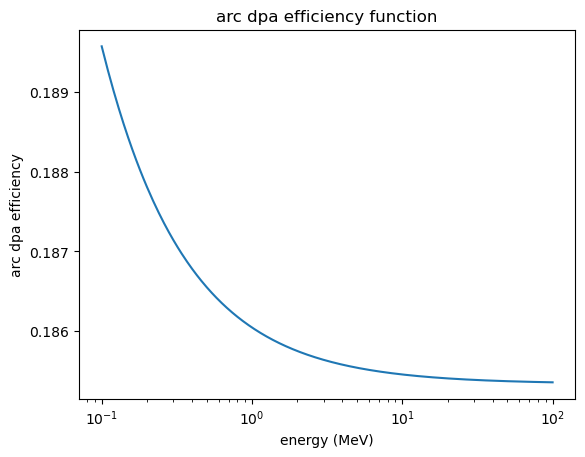

In [27]:
hea1.get_arc_dpa_constants(plot=True)

Radiační poškození <b>NRT dpa</b> způsobené neutrony s různou energií je možné vypočítat pomocí metody <br>
<span  span style = "font-family: Courier New;"> <b>get_NRT_dpa_spectrum(fluence,thickness,**kwargs)</b></span><br>
&nbsp;&nbsp;parametry:<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>fluence</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;celková fluence (počet neutronů na cm<sup>2</sup>)<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>thickness</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;tloušťka ozařovaného vzorku (mm)
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>**kwargs</b> : </span> <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;">spectrum = <i> file name </i> </span> <br>
&nbsp;&nbsp;parametr <span style = "font-family: Courier New;">spectrum</span> unožňuje zadat jméno souboru obsahujícího energetické spektrum neutronů.<br>
Spektrum neutronů je očekáváno ve dvou sloupcovém formátu <span style = "font-family: Courier New;"> E[i] I[i]</span>, kde <span style = "font-family: Courier New;"> E[i] </span> je energie v jednotkách MeV a <span style = "font-family: Courier New;"> I[i]</span> je relativní zastoupení neutronů s touto energií ve spektru.
Zadané spektrum nemusí být nijak normované, program sám provede renormalizaci spektra na jednotkovou plochu. <br>
&nbsp;&nbsp;<span style = "font-family: Courier New;">plot = <i> True, False, default = True </i> </span> <br>
&nbsp;&nbsp;Pokud je tento přepínač  <span style = "font-family: Courier New;"><i> True</i></span>, tak program vykresí energetické spektrum neutronů.<br>
V tomto konkrétním případě jsme použili spektrum neutronů experimentálního reaktoru LVR 15 v Centru výzkumu Řež, kde byly ozařovány vzorky slitin s vysokou entropií v rámci tohoto projektu TAČR. Toto spektrum je uloženo s souboru nazvaném <span style = "font-family: Courier New;"> neutron_energy_spectrum_LVR15.txt</span>. Energetické spektrum jaderného reaktoru obsahuje velmi vysoký příspěvek termálních neutronů. Fluence neutronů je většinou udávána pro energetické neutrony s energií vyšší než 0.5 MeV. Frakce takových energetických neutronů ve spektru reaktoru LVR 15 je $5.47\times 10^{-2}$. Proto je fluence korigována touto frakcí tak, aby zadaná hodnota fluence odpovídala fluenci energetických neutronů $E > 0.5$ MeV. 

spectrum file: neutron_energy_spectrum_LVR15.txt


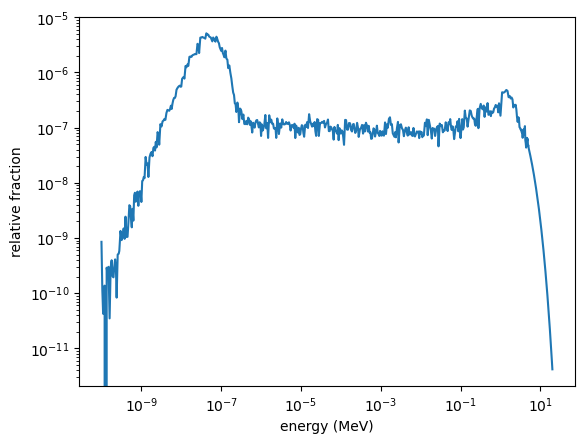

fluence: 18.282 x 1e16 1/cm2,  NRT dpa: 0.660


In [29]:
fast_neutron_fraction=5.47e-2 #frakce neutronů E > 0.5 MeV ve spektrum reaktoru LVR 15
hea1.get_NRT_dpa_spectrum(fluence/fast_neutron_fraction,thickness,spectrum='neutron_energy_spectrum_LVR15.txt',plot=True)

Radiační poškození <b>arc dpa</b> s uvážením atermálního zotavení radiačních defektů lze vypočítat použitím metody <br>
<span  span style = "font-family: Courier New;"> <b>get_arc_dpa_spectrum(fluence,thickness,**kwargs)</b></span><br>
&nbsp;&nbsp;parametry:<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>fluence</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;celková fluence (počet neutronů na cm<sup>2</sup>)<br>
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>thickness</b> : <i>float</i> </span> <br>
&nbsp;&nbsp;tloušťka ozařovaného vzorku (mm)
&nbsp;&nbsp;<span style = "font-family: Courier New;"><b>**kwargs</b> : </span> 
<span style = "font-family: Courier New;">spectrum = <i> file name </i> </span> <br>
&nbsp;&nbsp;parametr <span style = "font-family: Courier New;">spectrum</span> unožňuje zadat jméno souboru s energetickým spektrem neutronů.
Očekávaná struktura tohoto souboru je stejná jako u metody <span  span style = "font-family: Courier New;"> <b>get_NRT_dpa_spectrum(fluence,thickness,**kwargs)</b></span><br>
&nbsp;&nbsp;<span style = "font-family: Courier New;">plot = <i> True, False, default = True </i> </span> <br>
&nbsp;&nbsp;Pokud je tento přepínač  <span style = "font-family: Courier New;"><i> True</i></span>, tak program vykreslí energetické spektrum neutronů.  

spectrum file: neutron_energy_spectrum_LVR15.txt


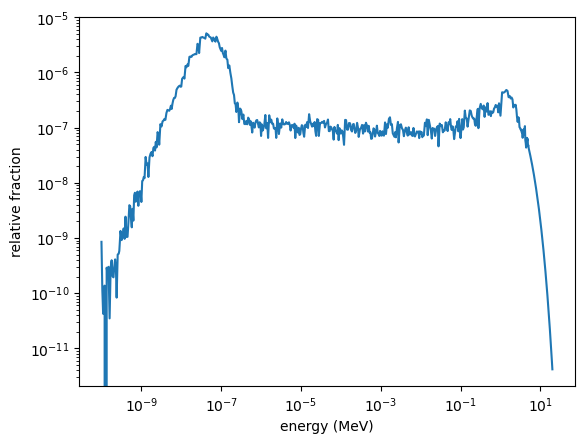

fluence: 18.282 x 1e16 1/cm2,  arc dpa: 0.124


In [31]:
hea1.get_arc_dpa_spectrum(fluence/fast_neutron_fraction,thickness,spectrum='neutron_energy_spectrum_LVR15.txt',plot=True)